<!--NAVIGATION-->


[[step08.comprehension 학습 page로 이동](step08Comprehension.ipynb) ] | [[step09. Assert문 학습 page로 이동](step09_2goodCode.ipynb) ]

## 예외처리 기본 syntax

**학습 주 목적 : 전원이 다운되는 심각한 문제는 불가항력, 단 실행시 발생되는 소소한 에러는 처리후에 실행 유지를 위한 작업<br>**

어떤 일이든 발생되는 경우의 수는 다양함<br>
가령 login 시도시 발생 가능한 경우의 수<br>
경우의 수 1 - 회원 미가입자가 착각해서 시도 : 회원가입 해라!!!<br>
경우의 수 2 - id/pw 정상 따라서 로그인 성공 : 인증받은 상태뢔 로직 수행<br>
경우의 수 3 - id는 일치 단 pw 다를 수도 있음 : pw 틀렸다는 메세지<br>
경우의 수 4 - id는 틀렸음, pw는 일치 : 재확인 하세요<br>
경우의 수 5 - id/pw 둘다 틀림 : 재확인 하세요<br>
경우의 수 6 - 회원가입, id/pw도 다 일치. 단 서버시스템 오류 발생

<hr>

**프로그램 개발 관점 <br>**

**개발 방법1<br>**

경우의 수 1 - id/pw등이 일치 다라서 정상 인증<br>
경우의 수 2 
- 회원미가입,id/pw 등 정상 인증 불가<br>
- 정상 실행은 맞으나 단 결과만 부정적인 결과일 뿐<br>
- if 조건식으로 검증후 else 문으로 결과
            
경우의 수 3 - 시스템이 맛이 감(전원다운... 심각한 에러), 프로그램 코드에 이슈 있을 수 있음(개발자가 코드 개선)
            - 정상실행 불가

In [2]:
from IPython.display import Image

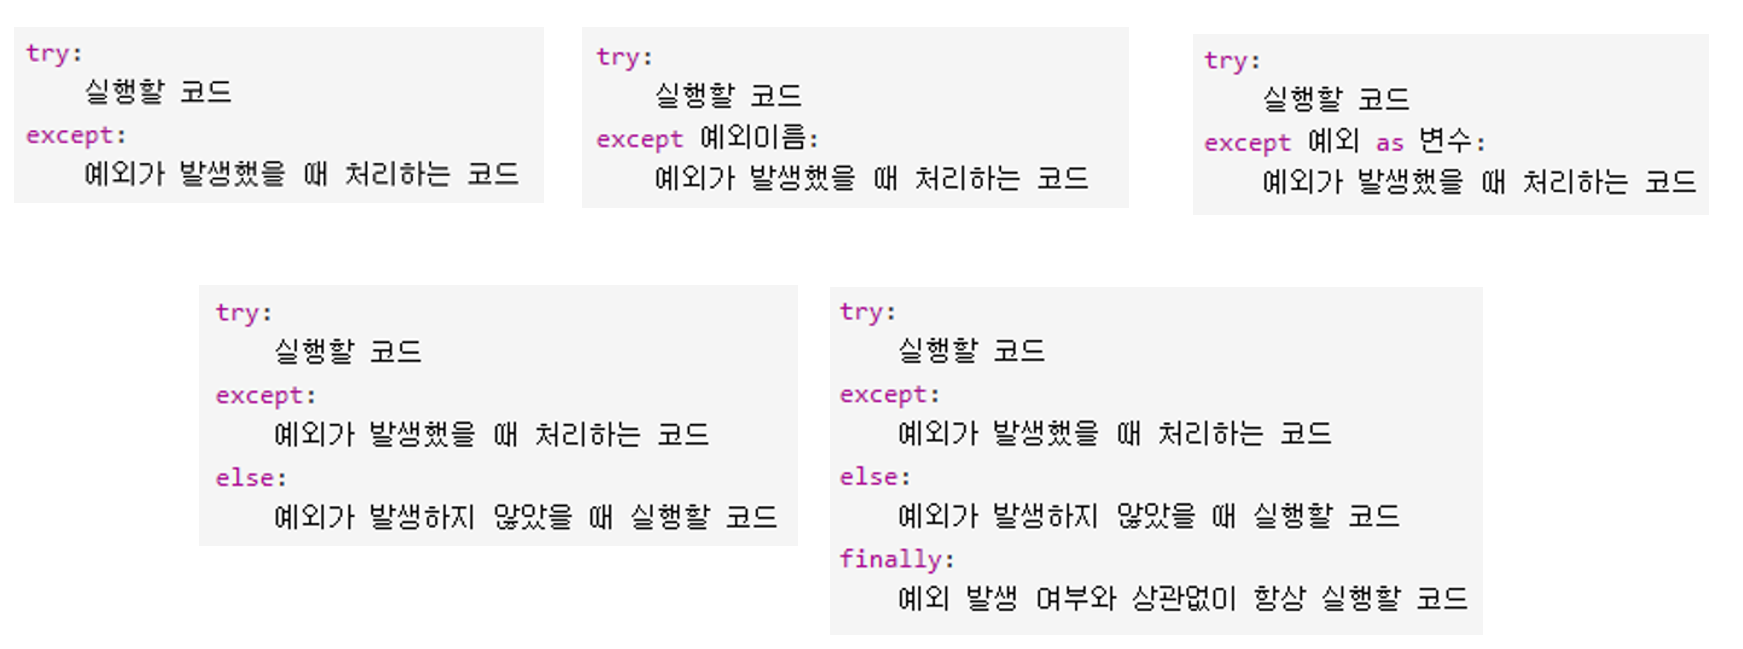

In [8]:
Image('img/exception5.png')

**발생되는 모든 예외 처리**

map() : 시퀀스의 모든 항목에 함수를 적용한 결과 리스트 반환

In [4]:
print(type('a b'.split()))  # <class 'list'>
print('a b'.split())   # ['a', 'b']

<class 'list'>
['a', 'b']


In [9]:
# 반드시 무슨일이 있어도 1,2는 나와야 함.

print(1)
print(10/0)    # 시스템 멈춤
print(2)

1


ZeroDivisionError: division by zero

In [12]:
try:
    print(1)
    print(10/0)   # 오류 발생시 excpt 영역으로 이동
except:
    print("연산 오류")
    
print(2)

1
연산 오류
2


In [13]:
try:
    print(1)
    print(10/0)   # 오류 발생시에만 excpt 영역으로 이동
    #... 추가 코드를 실행시 예외 발생
except I:
    print("연산 오류")
    
print(2)

1


NameError: name 'ZeroDicisionError' is not defined

In [11]:
try:
    print(1)
    print(10/2)
except:
#     print("연산 오류")
    pass
    
print(2)

1
5.0
2


In [17]:
# map() 함수 사용 전 - index와 div_number 항목 모두 int()로 형변환
# split() 함수로 입력된 문자열을 list로 변환 후에 int로 형변환

data = [10, 20, 30]

try:
    index, div_number =  input('인덱스와 나눌 숫자를 입력하세요: ').split()
    print('연산된 결과값 ', data[int(index)] / int(div_number))
    
except IndexError:        
    print('발생되는 모든 예외 처리')


인덱스와 나눌 숫자를 입력하세요: 10 2
발생되는 모든 예외 처리


In [16]:
# map() 함수 사용 전 - index와 div_number 항목 모두 int()로 형변환
# split() 함수로 입력된 문자열을 list로 변환 후에 int로 형변환

data = [10, 20, 30]

index, div_number =  input('인덱스와 나눌 숫자를 입력하세요: ').split()
print('연산된 결과값 ', data[int(index)] / int(div_number))


인덱스와 나눌 숫자를 입력하세요: 10 2


IndexError: list index out of range

**특정 예외만 처리하기**

list 내에 존재하는 데이터를 활용해서 index와 나누고자 하는 값을 입력후에 연산하기<br>
0으로 나눌 경우 - ZeroDivisionError 발생 <br>
미존재하는 index값 입력한 경우 - IndexError 발생

In [14]:
data = [10, 20, 30]

try:
    index, div_number = map(int, input('인덱스와 나눌 숫자를 입력하세요: ').split())
    print('연산된 결과값 ', data[index] / div_number)
    
except ZeroDivisionError:    # 숫자를 0으로 나눠서 에러가 발생했을 때 실행됨
    print('숫자를 0으로 나눌 수 없습니다.')
    
except IndexError:           # 범위를 벗어난 인덱스에 접근하여 에러가 발생했을 때 실행됨
    print('입력하신 인덱스엔 데이터가 존재하지 않습니다')


인덱스와 나눌 숫자를 입력하세요: 1 2
연산된 결과값  10.0


**예외의 에러 메세지 받아오기**

In [18]:
data = [10, 20, 30]

try:
    index, div_number = map(int, input('인덱스와 나눌 숫자를 입력하세요: ').split())
    print('연산된 결과값 ', data[index] / div_number)
    
except ZeroDivisionError as e: # e 는 발생된 예외 상황에 대한 메세지 확인 가능한 변수
    print('숫자를 0으로 나눌 수 없습니다.', e)
    
except IndexError as e:           
    print('입력하신 인덱스엔 데이터가 존재하지 않습니다', e)  # list index out of range

인덱스와 나눌 숫자를 입력하세요: 50 2
입력하신 인덱스엔 데이터가 존재하지 않습니다 list index out of range


**예외가 발생하지 않았을때 실행할 코드 적용하기 : else**

In [25]:
data = [10, 20, 30]

try:
    # map(int, 입력)
    # 입력되는 데이터를 split()으로 구분 후에 int로 형변환해주는 코드
    index, div_number = map(int, input('인덱스와 나눌 숫자를 입력하세요: ').split())
    print('연산된 결과값 ', data[index] / div_number)
    
except ZeroDivisionError as e:    
    print('숫자를 0으로 나눌 수 없습니다.', e)
    
except IndexError as e:           
    print('입력하신 인덱스엔 데이터가 존재하지 않습니다', e)

else:
    print('예외가 발생되지 않았을때만 실행되는 블록')
    

KeyboardInterrupt: Interrupted by user

**예외와 무관하게 항상 실행되는 코드 : finally**

In [ ]:
##### data = [10, 20, 30]

try:
    index, div_number = map(int, input('인덱스와 나눌 숫자를 입력하세요: ').split())
    
except ZeroDivisionError as e:    
    print('숫자를 0으로 나눌 수 없습니다.', e)
    
except IndexError as e:           
    print('입력하신 인덱스엔 데이터가 존재하지 않습니다', e)

else:
     print('연산된 결과값 ', data[index] / div_number)
        
finally:
    print('로직 종료')
    

**예외 발생시키기**

5의 배수가 아닌 경우 직접 코드상에서 예외 발생 및 처리<br>

python 언어를 사용하는 개발자들을 사용자라 지정, 사용자가 로직 즉 상황에 맞게 예외를 직접 발생시키는 코드

In [ ]:
try:
    x = int(input('5의 배수 입력 : '))
    
    if x % 5 !=0:
        raise Exception('5의 배수가 아닙니다')   # 예외 발생 하는 코드
        
    print('5의 배수 ', x)
except Exception as e:
    print('5의 배수가 아닌 예외 발생')
    
raise
    

18 미만인 경우 예외 발생

하단 코드의 아쉬운 점<br>

1. 5 입력시 - 18 미만 출입 불가 <br>
2. 20 입력시 - 출입 가능 출력 <br>
3. ㅕ 입력 - 미성년자 출입 불가

In [28]:
try:    
    age = int(input("나이 입력 : "))    
    
    if(age<18):
#         print("18 미만 출입 불가")
        raise ValueError
    else:    
        print('출입 가능')    
except ValueError:    
    print('미성년자 출입 불가')    

나이 입력 : 5
미성년자 출입 불가


실전 응용

id 값 검증하는 함수 개발 해서 master인 경우에만 인증 성공/master가 아니라면 예외 발생<br>
인증 로직은 요청하는 client가 호출시 마다 재사용이 되는 함수 <br>

In [31]:
def login_check2(id):
    if id != "master":
        raise Exception    # python 내부에 예외 처리 타입으로 제시가 되어 있음

In [33]:
login_check2("master")

In [35]:
login_check2("mas")    # 사용자에게 

인증실패


In [35]:
try:
    login_check2("mas")
    # 인증 성공 및 인증 후에 그 이상의 로직 코드가 있다 가정
except Exception:
    print("인증실패")

인증실패
